In [1]:
# Standard Packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys , os

In [2]:
# Custom modules
sys.path.append(r'G:\Research\AI_STM\NanoscoPy') # Specifies custom module directory
import nanoscopy as nano
from nanoscopy import spm
from nanoscopy.utilities import dialog_askfilename, dialog_askdirectory 

In [ ]:
file_path = r'C:\Users\Darian\Downloads\2021-09-15_ds-1_wse2(sl333)_exf_019.dat'

In [37]:
file = dialog_askfilename()

In [38]:
data = pd.read_csv(file , sep = '  ', header=None, names=["X","Height"])
data = data * 10**10
data.head()

C:\Users\Darian\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,X,Height
0,0.000000,-0.670263
1,9.765625,-0.728688
2,19.531250,-0.610933
3,29.296875,-0.579635
4,39.062500,-0.491821


In [39]:
spec = nano.spectrum.peak_fit.PeakFit(data.to_numpy())

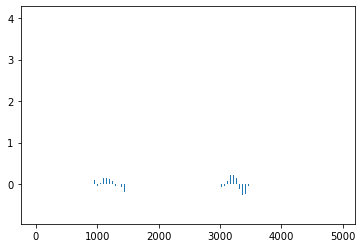

In [6]:
plt.bar(spec.data_x, spec.data_y)
plt.show()

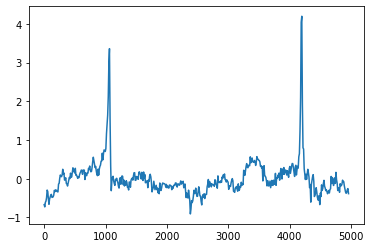

In [40]:
plt.plot(spec.data_x, spec.data_y)
plt.show()

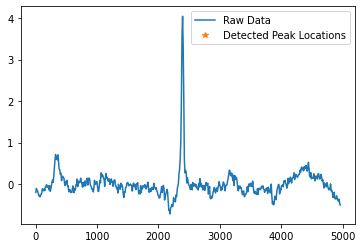

In [35]:
# Locate the peaks in the data and determine parameter values.
peak_indices , peak_properties = spec.locate_peaks(filter_window_length=9,filter_polyorder=1,finder_prominence=5,wlen=300, width=150)

# Generate a plot to visualize the peak detection results
plt.plot(spec.data_x,spec.data_y,label='Raw Data')
plt.plot(spec.data_x[peak_indices], spec.data_y[peak_indices],'*',label='Detected Peak Locations')
plt.legend()

new_model_parameters = spec.generate_model_parameters(peak_indices,peak_properties)

spec.make_composite_model(new_model_parameters)

In [54]:
model_WSe2_13 = [
    {'name':'left',
    'type': 'Gaussian',
    'center': {'value':10},
    'height': {'value':1200},
    'FWHM': {'value':5} 
    } ,
    {'name':'right',
    'type': 'Lorentzian',
    'center': {'value':13},
    'height': {'value':2200},
    'FWHM': {'value':3} 
    }
    ]

model_WSe2_19 = [
    {'name':'left',
    'type': 'Gaussian',
    'center': {'value':15},
    'height': {'value':4000},
    'FWHM': {'value':5} 
    } ,
    {'name':'right',
    'type': 'Gaussian',
    'center': {'value':18},
    'height': {'value':1000},
    'FWHM': {'value':5} 
    }
    ]

model_WSe2_SBP = [
    {'name':'left',
    'type': 'Gaussian',
    'center': {'value':1000},
    'height': {'value':3.5},
    'FWHM': {'value':300} 
    },
    {'name':'right',
    'type': 'Gaussian',
    'center': {'value':4500},
    'height': {'value':4},
    'FWHM': {'value':300} 
    }
    ]

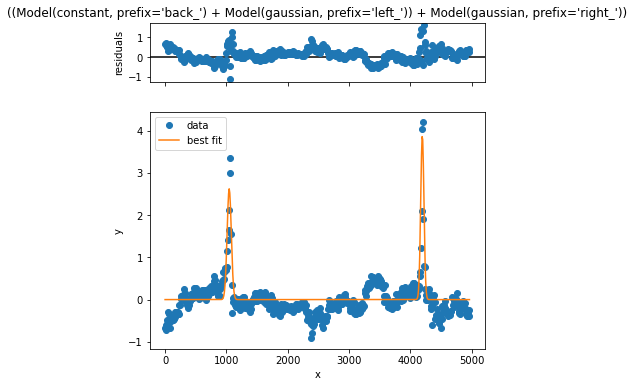

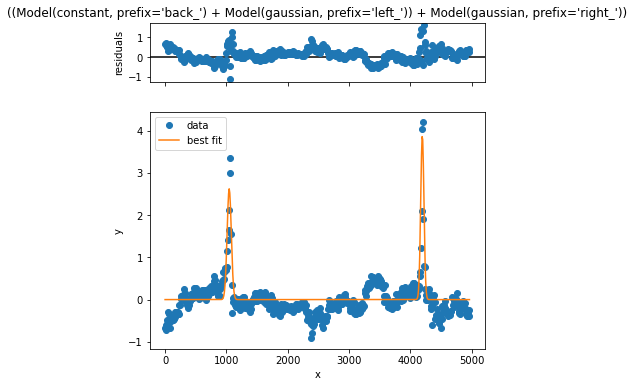

In [55]:
spec.make_composite_model(model_WSe2_SBP)
spec.fit_spectrum()
spec.results.plot()

In [47]:
# Print out the fit report generated by lmfit
print(spec.results.fit_report())

[[Model]]
    ((Model(constant, prefix='back_') + Model(gaussian, prefix='left_')) + Model(gaussian, prefix='right_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 380
    # data points      = 509
    # variables        = 7
    chi-square         = 44.0330361
    reduced chi-square = 0.08771521
    Akaike info crit   = -1231.78149
    Bayesian info crit = -1202.15436
##  Warning: uncertainties could not be estimated:
    back_c:           at initial value
    back_c:           at boundary
    left_amplitude:   at boundary
[[Variables]]
    back_c:           1.0000e-06 (init = 1e-06)
    left_amplitude:   223.538076 (init = 1117.69)
    left_center:      1045.25443 (init = 1000)
    left_sigma:       33.9761439 (init = 127.3983)
    right_amplitude:  147.309332 (init = 638.6802)
    right_center:     4193.75071 (init = 4500)
    right_sigma:      14.1652492 (init = 63.69914)
    left_fwhm:        80.0077031 == '2.3548200*left_sigma'
    left_height:      

In [10]:
results = spec.results
left_center = results.values['left_center']
right_center = results.values['right_center']
center_offset = right_center - left_center
center_offset

KeyError: 'right_center'

In [20]:
results = spec.results
height = results.values['left_height']
fwhm = results.values['left_fwhm']
print(height, fwhm)

3.9999993150229467 60.00001253994857


In [48]:
comps = spec.results.eval_components()

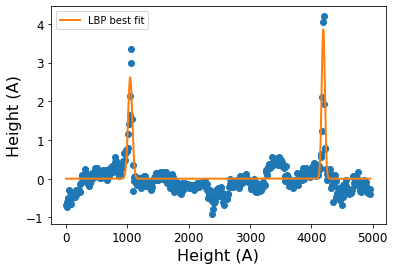

In [56]:
plt.plot(spec.data_x, spec.data_y, 'o')
plt.plot(spec.data_x, spec.results.best_fit, label='LBP best fit', linewidth=2.0)
# plt.plot(spec.data_x, comps['left_'], 'k--', label='Gaussian')
# plt.plot(spec.data_x, comps['right_'], 'r--', label='Gaussian component 2')
# plt.annotate(r'$Height$ = {:.2f} A'.format(height), 
#     xy=(0.5, 0.35),
#     xycoords='axes fraction',
#     size = 15)
# plt.annotate(r'$FWHM$ = {:.2f} A'.format(fwhm), 
#     xy=(0.5, 0.45),
#     xycoords='axes fraction',
#     size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Height (A)', size = 16)
plt.ylabel('Height (A)', size = 16)
plt.legend(loc='best')
plt.show()

NameError: name 'right_center' is not defined

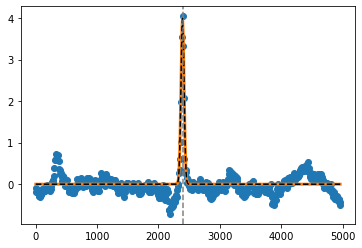

In [15]:
plt.plot(spec.data_x, spec.data_y, 'o')
plt.plot(spec.data_x, spec.results.best_fit, label='best fit', linewidth=3.0)
plt.plot(spec.data_x, comps['left_'], 'k--', label='Gaussian component 1')
plt.plot(spec.data_x, comps['right_'], 'r--', label='Gaussian component 2')
plt.axvline(x=left_center, color='grey', linestyle='--')
plt.axvline(x=right_center, color='grey', linestyle='--')
plt.annotate(r'$\Delta$ = {:.2f} nm'.format(center_offset), 
    xy=(0.35, 0.45),
    xycoords='axes fraction',
    size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Height (nm)', size = 16)
plt.ylabel('Count', size = 16)
plt.legend(loc='best')
plt.show()